**A simple A <-> B reaction between 2 species with initial uniform concentrations across 3 bins,
with 1st-order kinetics in both directions, taken to equilibrium**

Diffusion NOT taken into account

LAST REVISED: Aug. 7, 2022

In [1]:
import set_path
set_path.add_ancestor_dir_to_syspath(3)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from modules.chemicals.chemicals import Chemicals as chem
from modules.reactions.reactions import Reactions
from life_1D.bio_sim_1d import BioSim1D as bio

from modules.html_log.html_log import HtmlLog as log
from modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js",
                  home_rel_path="../../..")    # relative path is from the location of THE LOG FILE to the project's home

-> Output will be LOGGED into the file 'reaction_1.log.htm'


In [4]:
# Initialize the system
chem_data = chem(names=["A", "B"])       # Diffusion NOT taken into account
bio.initialize_system(n_bins=3, chem_data=chem_data)

bio.set_uniform_concentration(species_name="A", conc=10.)
bio.set_uniform_concentration(species_name="B", conc=50.)

bio.describe_state()

3 bins and 2 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [10. 10. 10.]
  Species 1 (B). Diff rate: NOT SET. Conc:  [50. 50. 50.]


In [5]:
A_values = [bio.bin_concentration(bin_address = 0, species_index = 0)]
B_values = [bio.bin_concentration(bin_address = 0, species_index = 1)]

In [8]:
# Specify the reaction
rxn = Reactions(chem_data)

# Reaction A <-> B , with 1st-order kinetics in both directions
rxn.add_reaction(reactants=["A"], products=["B"], forward_rate=3., reverse_rate=2.)

bio.all_reactions = rxn

print("Number of reactions: ", rxn.number_of_reactions())

Number of reactions:  1


In [9]:
rxn.describe_reactions()

Number of reactions:  1
0: A <-> B  (Rf = 3.0 / Rb = 2.0)


['0: A <-> B  (Rf = 3.0 / Rb = 2.0)']

In [10]:
# Send the plot to the HTML log file
graph_data = rxn.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")


 {'reactants': [(1, 0, 1)], 'products': [(1, 1, 1)], 'Rf': 3.0, 'Rb': 2.0} 

[Graphic element sent to log file]


In [11]:
# First step
bio.react(time_step=0.1, n_steps=1)
bio.describe_state()

3 bins and 2 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [17. 17. 17.]
  Species 1 (B). Diff rate: NOT SET. Conc:  [43. 43. 43.]


NOTE: the concentration of species A is increasing, while that of species B is decreasing.
All bins have identical concentrations; so, there's no diffusion:
[[17. 17. 17.]
 [43. 43. 43.]]

In [12]:
A_values.append(bio.bin_concentration(bin_address = 0, species_index = 0))
B_values.append(bio.bin_concentration(bin_address = 0, species_index = 1))

In [16]:
A_values

[10.0, 17.0]

In [17]:
# Numerous more steps
bio.react(time_step=0.1, n_steps=10)

bio.describe_state()

3 bins and 2 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [23.99316406 23.99316406 23.99316406]
  Species 1 (B). Diff rate: NOT SET. Conc:  [36.00683594 36.00683594 36.00683594]


NOTE: Consistent with the 3/2 ratio of forward/reverse rates (and the 1st order reactions),
 the systems settles in the following equilibrium:

[A] = 23.99316406
 
[B] = 36.00683594


In [11]:
A_eq = bio.bin_concentration(0, 0)
B_eq = bio.bin_concentration(0, 1)
print(f"Ratio of equilibrium concentrations: {B_eq / A_eq}")
print(f"Ratio of forward/reverse rates: {rxn.get_forward_rate(0) / rxn.get_reverse_rate(0)}")

Ratio of equilibrium concentrations: 1.5007122797020636
Ratio of forward/reverse rates: 1.5


# Plots of changes of concentration with time

In [18]:
A_values.append(bio.bin_concentration(bin_address = 0, species_index = 0))
B_values.append(bio.bin_concentration(bin_address = 0, species_index = 1))

In [19]:
A_values

[10.0, 17.0, 23.9931640625]

In [52]:
B_values

[50.0, 43.0, 36.0068359375]

In [20]:
import plotly.express as px

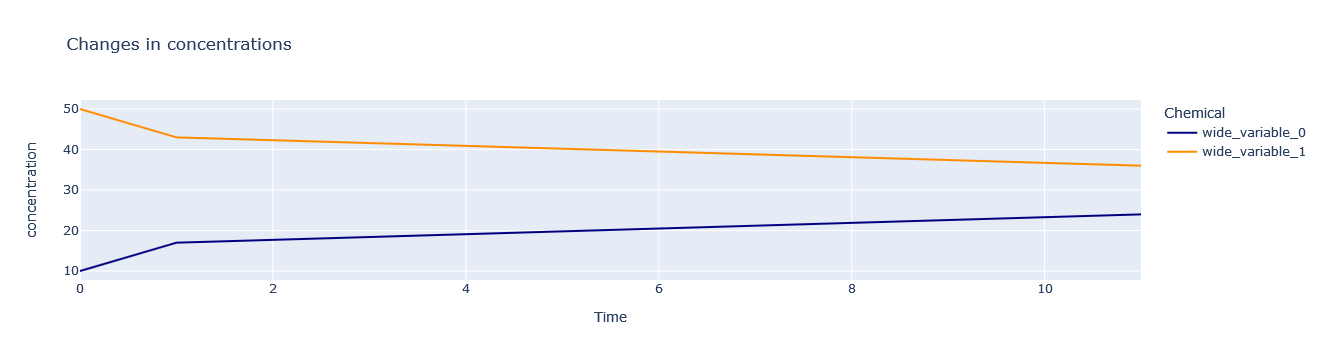

In [58]:
fig = px.line(x=[0,1,11], y=[A_values, B_values], title="Changes in concentrations",
             color_discrete_sequence = ['navy', 'darkorange'],
             labels={"x":"Time", "value":"concentration", "variable":"Chemical"})
fig.show()

In [28]:
import pandas as pd

In [39]:
c = pd.DataFrame({"t": [0, 1, 11], "A": A_values, "B": B_values})

In [40]:
c

,t,A,B
0,0,10.000000,50.000000
1,1,17.000000,43.000000
2,11,23.993164,36.006836


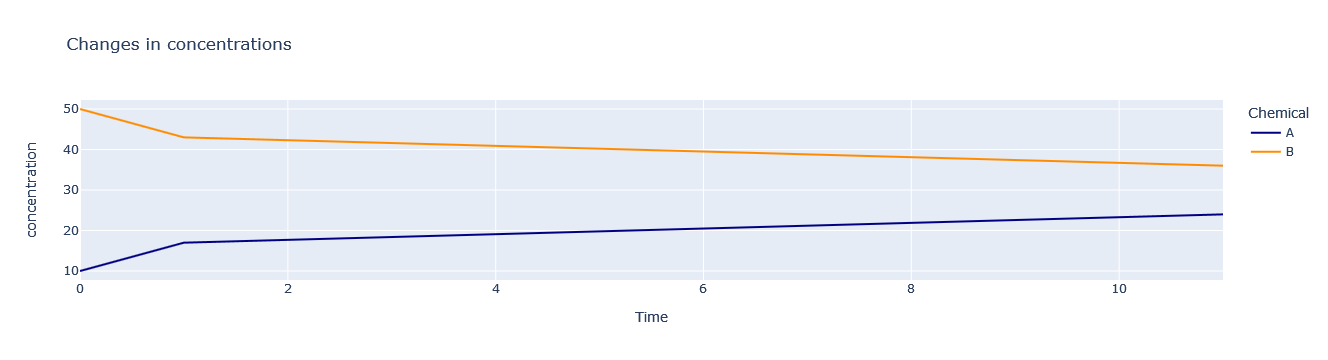

In [50]:
fig = px.line(data_frame=c, x="t", y=["A", "B"], title="Changes in concentrations",
              color_discrete_sequence = ['navy', 'darkorange'],
              labels={"t":"Time", "value":"concentration", "variable":"Chemical"})
fig.show()

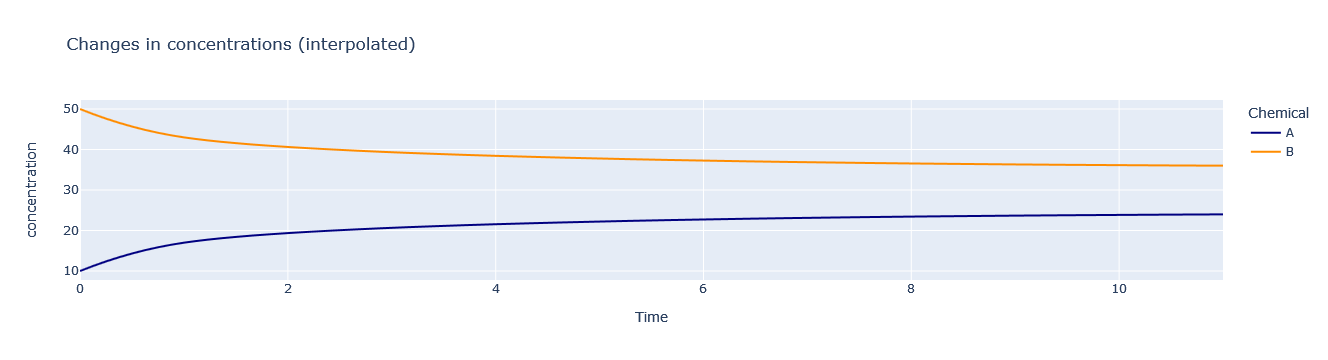

In [51]:
fig = px.line(data_frame=c, x="t", y=["A", "B"], title="Changes in concentrations (interpolated)", 
              line_shape="spline", color_discrete_sequence = ['navy', 'darkorange'],
              labels=dict(t="Time", value="concentration", variable="Chemical"))
fig.show()